# Урок 1. Алгоритм линейной регрессии. Градиентный спуск

### Простая линейная регрессия

Линейная регрессия - это метод прогнозирования, которому уже более 200 лет.  
Простая линейная регрессия - это отличный первый алгоритм машинного обучения для самостоятельной реализации, поскольку он быстро настраивается и достаточно прост для понимания.  
В этом уроке вы узнаете, как реализовать простой алгоритм линейной регрессии с нуля в Python. 

После завершения этого урока вы узнаете:  
- Как реализовать линейную регрессию "с нуля" на Python.  
- Как найти оптимальные коэффициенты линейной регрессии.  
- Как делать прогнозы и оценить работу модели.  

Давайте начнем!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import warnings
warnings.simplefilter('ignore')

Линейная регрессия предполагает линейную зависимость между входными переменными (X) и целевой переменной (y).  
Это означает, что выход (y) может быть вычислен как **линейная комбинация** входных переменных (X).  
Если Х состоит из одной переменной, то линейная регрессия называется простой.  
В простой линейной регрессии мы можем использовать статистику обучающих данных для оценки коэффициентов, требуемых моделью для прогнозирования новых данных.  
Уравнение простой линейной регрессии может быть записано как:
$$y = w_0 + w_1 × X$$  
Как видите, это простое уравнение прямой, известное нам еще со школы.  
w0 и w1 - это коэффициенты, которые мы должны найти.  
w0 называется смещением или bias и отвечает за смещение регрессионной прямой по оси y относительно начала координат.  
w1 - это коэффициент при признаке Х, он отвечает за угол наклона прямой.  
Как только коэффициенты известны, мы можем использовать это уравнение для оценки целевой переменной (y), на новых данных (X_test).  
Когда признаков больше чем один, уравнение линейной регрессии принимает следующий вид:  
$$y = w_0 + \sum_{i=1}^m w_i x_i$$  
Если мы добавим фиктивный признак x0 = 1, тогда уравнение можно переписать чуть более компактно, убрав w0 под знак суммы:
$$y = \sum_{i=0}^m w_i x_i = \vec{w}^T \vec{x}$$. 
Так же его можно записать в мтаричном виде:  
$$\vec y = X \vec w + \epsilon$$  
ϵ – непрогнозируемая ошибка модели  

Непрогнозируемая ошибка складывается из:
- Смещение (Bias) – средняя ошибка по всевозможным наборам данных (показывает, насколько модель отличается от "идеальной")
- Дисперсия (Var) – вариативность ошибки (то, на сколько ошибка будет отличаться, если обучать модель на разных данных).  
Показывает, насколько утойчива модель.
- неустранимой ошибки: σ

![bias_var.png](bias_var.png)

Сгенерируем простой пример для наглядности:

In [2]:
X = np.array([[1, 1, 1, 1, 1,
               1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 
               0, 5, 10, 1, 2]]).T

In [3]:
X  # <- матрица "объекты-признаки" ([x0, x1])

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [4]:
X.shape

(10, 2)

In [5]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

Построим модель линейной регрессии!

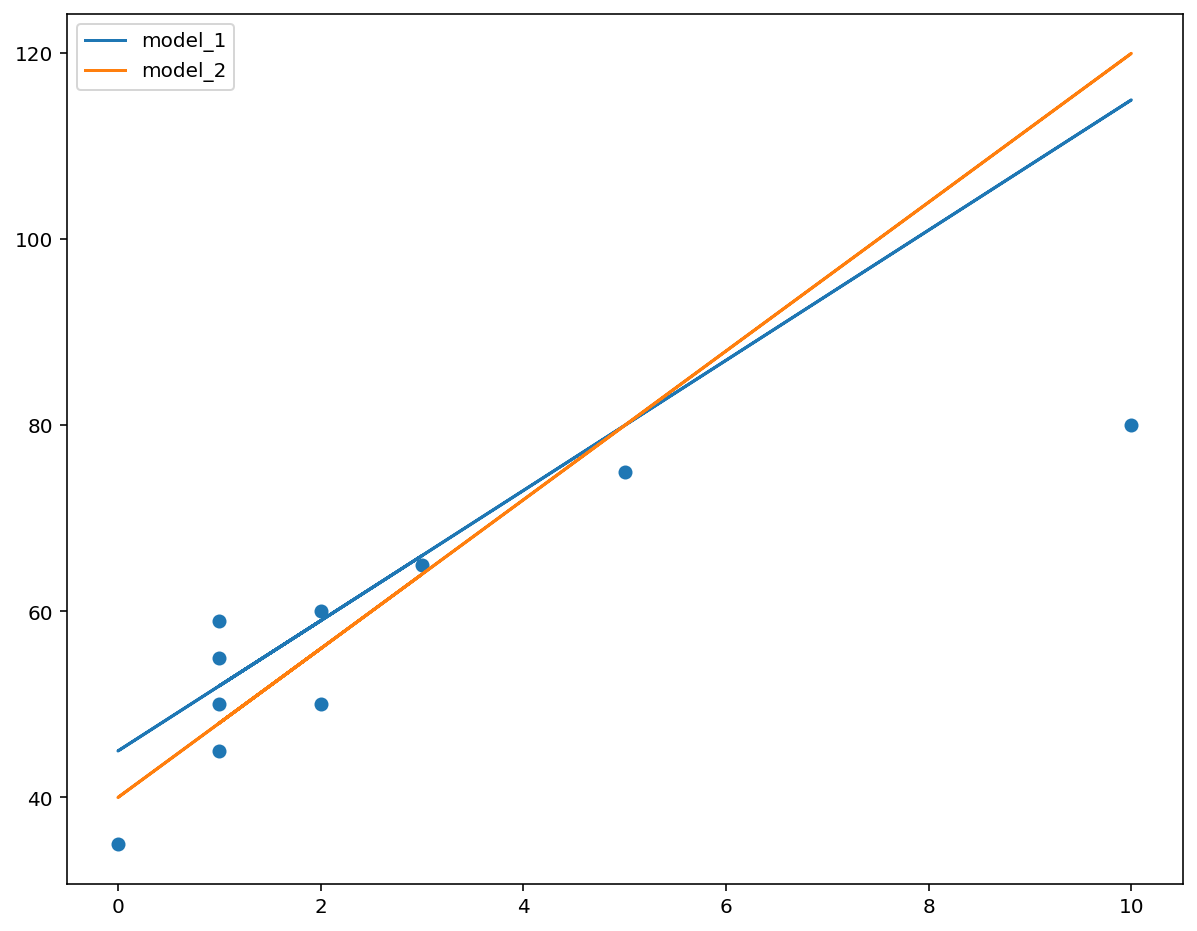

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 45*np.ones(10) + X[:,1]*7, label='model_1')
plt.plot(X[:,1], 40*np.ones(10) + X[:,1]*8, label='model_2')
plt.legend();

Сделаем прогноз значений y на обучающих данных:

In [7]:
y_pred1 = 45*np.ones(10) + X[:,1]*7
y_pred2 = 40*np.ones(10) + X[:,1]*8

In [8]:
y_pred2

array([ 48.,  48.,  56.,  48.,  64.,  40.,  80., 120.,  48.,  56.])

In [9]:
y

[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

### Как мы можем оценить работу модели?

1. Разность прогнозов

In [10]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
print(f'Разность прогнозов наших моделей: {err1}, {err2}')

Разность прогнозов наших моделей: -58.0, -34.0


2. Средняя абсолютная ошибка (MAE)

In [11]:
mae_1 = np.sum(np.abs(y - y_pred1))/len(y)
mae_2 = np.sum(np.abs(y - y_pred2))/len(y)
print(f'MAE наших моделей: {mae_1}, {mae_2}')

MAE наших моделей: 8.0, 8.4


In [12]:
def calc_mae(y, y_pred):
    return np.mean(np.abs(y - y_pred))

3. Среднеквадратичная ошибка (MSE)

In [13]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
print(f'MSE наших моделей: {mse_1}, {mse_2}')

MSE наших моделей: 154.4, 188.6


In [14]:
def calc_mse(y, y_pred):
    return np.mean((y - y_pred)**2)

4. RMSE

In [15]:
rmse_1 = np.sqrt(np.mean((y - y_pred1)**2))
rmse_2 = np.sqrt(np.mean((y - y_pred2)**2))
print(f'MSE наших моделей: {rmse_1}, {rmse_2}')

MSE наших моделей: 12.425779653607254, 13.733171520082315


5. Коэффициент детерминации (R2)

In [16]:
# предлагаю реализовать самим :)


### Методы поиска оптимальных параметров

1. **Метод наименьших квадратов (МНК)**   
Суть метода: минимизируем среднеквадратичную ошибку (MSE) между реальным значением целевой переменной и прогнозом, выданным моделью.   
$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2 \\ &=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\ &=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) \end{array}$$  

Для этого необходимо вычислить производные по параметрам модели, приравнять их к нулю и решить полученные уравнения относительно w  
$$\large\mathcal{L}{\partial \vec{w}} = 0$$
$$\vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$$  

Реализуем этот метод! (но для этого придется перемножить пару матриц О_о)  
Для тех, кто подзабыл как это делается: http://matrixmultiplication.xyz

In [17]:
W = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
print(W)

[47.23214286  3.91071429]


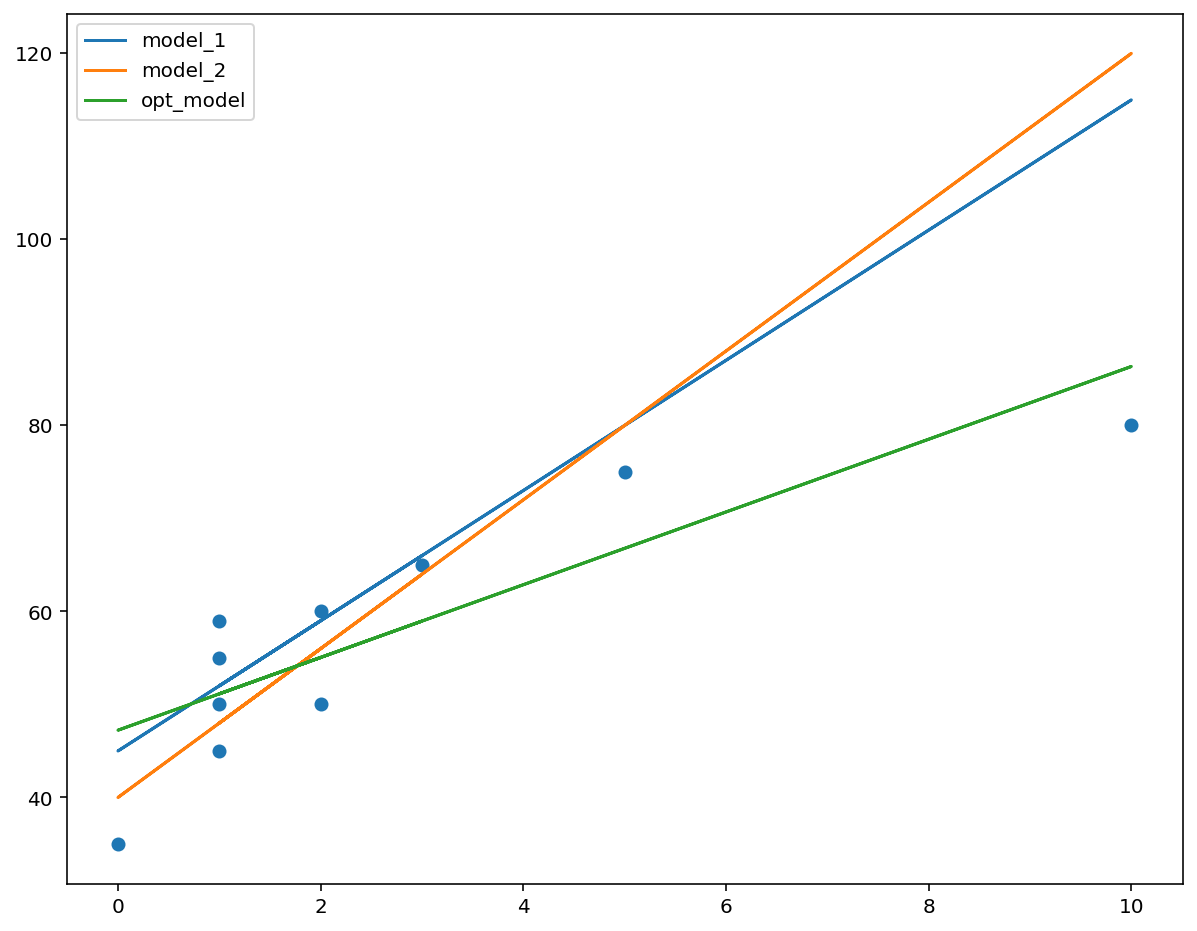

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 45*np.ones(10) + X[:,1]*7, label='model_1')
plt.plot(X[:,1], 40*np.ones(10) + X[:,1]*8, label='model_2')
plt.plot(X[:,1], W[0] + W[1] * X[:,1], label='opt_model')
plt.legend();

Оценка модели:

In [19]:
# метрики качества предыдущих моделей:
calc_mse(y, y_pred1)

154.4

In [20]:
calc_mae(y, y_pred1)

8.0

In [21]:
# прогноз модели с оптимальными параметрами:
y_pred3 = W[0] + W[1]*X[:,1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [22]:
calc_mse(y, y_pred3)

45.93750000000002

In [23]:
calc_mae(y, y_pred3)

6.182142857142859

**2. Градиентный спуск**  

Градиентный спуск - это итеративный алгоритм поиска весов признаков.  
Алгоритм обновляет веса с учетом градиента функции потерь:  
w = w − learning rate × error × X

In [24]:
W = np.array([0.01, 0.1])

In [25]:
y_pred = np.dot(X, W)
y_pred

array([0.11, 0.11, 0.21, 0.11, 0.31, 0.01, 0.51, 1.01, 0.11, 0.21])

In [26]:
calc_mse(y, y_pred)

3423.6233

In [27]:
lr = 0.01

In [28]:
grad_0 = (1/len(y))*lr*(2*np.sum(X[:,0]*(W[0]*X[:,0] - y)))
grad_1 = (1/len(y))*lr*(2*np.sum(X[:,1]*(W[1]*X[:,1] - y)))

In [29]:
W[0] = W[0] - grad_0; W[0]

1.1578

In [30]:
W[1] = W[1] - grad_1; W[1]

3.6688

In [31]:
y_pred = np.dot(X, W)
y_pred

array([ 4.8266,  4.8266,  8.4954,  4.8266, 12.1642,  1.1578, 19.5018,
       37.8458,  4.8266,  8.4954])

In [32]:
calc_mse(y, y_pred)

2227.5964155919996

### Домашнее задание:

1. Подберите скорость обучения (lr) и количество итераций (epoch):

In [40]:
n = X.shape[1]
epoch = 90
lr = 0.012
W = np.array([1, 0.5])
W, lr

(array([1. , 0.5]), 0.012)

In [41]:
for i in range(epoch):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for j in range(W.shape[0]):
        W[j] -= lr * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 10 == 0:
        print(f'# итерация: {i}, MSE: {err}, веса: {W}')

# итерация: 0, MSE: 3173.15, веса: [ 7.612 20.9  ]
# итерация: 10, MSE: 364.6834436471202, веса: [25.72983979  9.05170097]
# итерация: 20, MSE: 125.86627725452959, веса: [35.85695572  6.15284752]
# итерация: 30, MSE: 67.85926616474049, веса: [41.24888118  5.03270471]
# итерация: 40, MSE: 51.98014546835954, веса: [44.0891315   4.49316871]
# итерация: 50, MSE: 47.603575735386116, веса: [45.5816168   4.21574742]
# итерация: 60, MSE: 46.39687623882493, веса: [46.3654434   4.07078732]
# итерация: 70, MSE: 46.064160921425916, веса: [46.77704197  3.99475582]
# итерация: 80, MSE: 45.972423420722386, веса: [46.99317184  3.95484256]


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [113]:
n = X.shape[1]
epoch = 120
lr = 0.01
W = np.array([0.1, 0.05])
W, lr

(array([0.1 , 0.05]), 0.01)

In [83]:
np.dot(X.T, (y_pred - y))

array([-163.1,  163.1])

In [114]:
for i in range(epoch):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for j in range(W.shape[0]):
#         W[j] -= lr * (1/n * 2 * np.sum(X[:, j] * (y_pred - y)))
    W -= (lr * (1/n * 2 * (np.dot(X.T , (y_pred - y)))))
    if i % 10 == 0:
        print(f'# итерация: {i}, MSE: {err}, веса: {W}')

# итерация: 0, MSE: 3431.2025000000003, веса: [ 5.817 17.941]
# итерация: 10, MSE: 418.34337924534685, веса: [22.28272345  8.52512233]
# итерация: 20, MSE: 173.95827169600437, веса: [32.60306921  6.61209301]
# итерация: 30, MSE: 89.94714558071787, веса: [38.65484314  5.4945783 ]
# итерация: 40, MSE: 61.066676918253734, веса: [42.20311199  4.83936331]
# итерация: 50, MSE: 51.13845063715093, веса: [44.28352823  4.45519853]
# итерация: 60, MSE: 47.72542856189317, веса: [45.50331508  4.22995556]
# итерация: 70, MSE: 46.552135432145626, веса: [46.21849887  4.0978914 ]
# итерация: 80, MSE: 46.148792957951756, веса: [46.63782448  4.02045972]
# итерация: 90, MSE: 46.01013608920846, веса: [46.8836829   3.97506008]
# итерация: 100, MSE: 45.9624700771225, веса: [47.02783428  3.94844143]
# итерация: 110, MSE: 45.94608395266458, веса: [47.11235293  3.93283441]


Задание **3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию
начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [121]:
n = X.shape[1]
epoch = 0
lr = 0.012
W = np.array([1, 0.5])
W, lr

mse_prev = calc_mse(y, np.dot(X, W))**2

while True: 
    epoch += 1
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for j in range(W.shape[0]):
        W[j] -= lr * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if epoch % 10 == 0:
        print(f'# итерация: {epoch}, MSE: {err}, веса: {W}')
    if (mse_prev-err) < 0.001:
        print(mse_prev, err)
        break
    else:
        mse_prev = err
    

# итерация: 10, MSE: 420.34047784575193, веса: [23.81806553  6.78864705]
# итерация: 20, MSE: 137.0299045285047, веса: [35.04186815  5.9868213 ]
# итерация: 30, MSE: 70.87611215370222, веса: [40.84372468  5.06921967]
# итерация: 40, MSE: 52.81106503425123, веса: [43.87914996  4.52730918]
# итерация: 50, MSE: 47.832666847300516, веса: [45.47169115  4.2354853 ]
# итерация: 60, MSE: 46.460041900940716, веса: [46.30776256  4.08137069]
# итерация: 70, MSE: 46.0815771901305, веса: [46.746759    4.00033959]
# итерация: 80, MSE: 45.97722549912735, веса: [46.97727103  3.95777777]
# итерация: 90, MSE: 45.94845326251146, веса: [47.09831123  3.93542725]
45.94494193266975 45.944042340595665
